# Heart Disease Prediction using Ensemble Methods

The objective of this project is to predict the likelihood of heart disease based on clinical features such as age, cholesterol, and blood pressure. This project utilizes ensemble methods, including **Random Forest**, **Gradient Boosting**, and **XGBoost**, to build a robust classification model.

In [2]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
import xgboost as xgb


In [3]:
# load data
dataset = pd.read_csv('heart_disease_data.csv')

In [4]:
# Display first few rows data
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
# dataset information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
# Describe the dataset
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


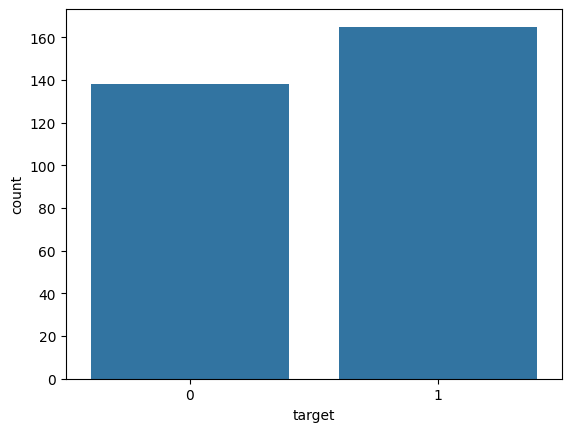

In [8]:
# Data Visualisation
sns.countplot(x='target', data=dataset)
plt.show()

In [9]:
dataset['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [10]:
# split the features and target
X = dataset.drop(columns='target', axis=1)
y = dataset['target']

In [15]:
print(X.shape)  # Original feature set
print(y.shape)  # Original target variable

(303, 13)
(303,)


In [16]:
# split the train and test 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state =42, stratify=y)

## Random Forest is a bagging algorithm that trains multiple decision trees on random subsets of the data, then aggregates their predictions.

In [17]:
# Initialize Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# Train the model
rf_model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [18]:
# Make predictions
y_pred_rf = rf_model.predict(X_test)

In [19]:
# Evaluate the model
print(classification_report(y_test, y_pred_rf))
accuracy_score(y_test, y_pred_rf)

              precision    recall  f1-score   support

           0       0.95      0.68      0.79        28
           1       0.78      0.97      0.86        33

    accuracy                           0.84        61
   macro avg       0.87      0.82      0.83        61
weighted avg       0.86      0.84      0.83        61



0.8360655737704918

In [20]:
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf})

,Actual,Predicted
179,0,0
197,0,0
285,0,0
194,0,1
188,0,1
...,...,...
14,1,1
4,1,1
224,0,0
202,0,0


In [21]:
# Make prediction
y_prob_rf = rf_model.predict_proba(X_test)[:,1]
# ROC-AUC Score
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)
print(f"Random Forest ROC-AUC Score: {roc_auc_rf:.2f}")


Random Forest ROC-AUC Score: 0.92


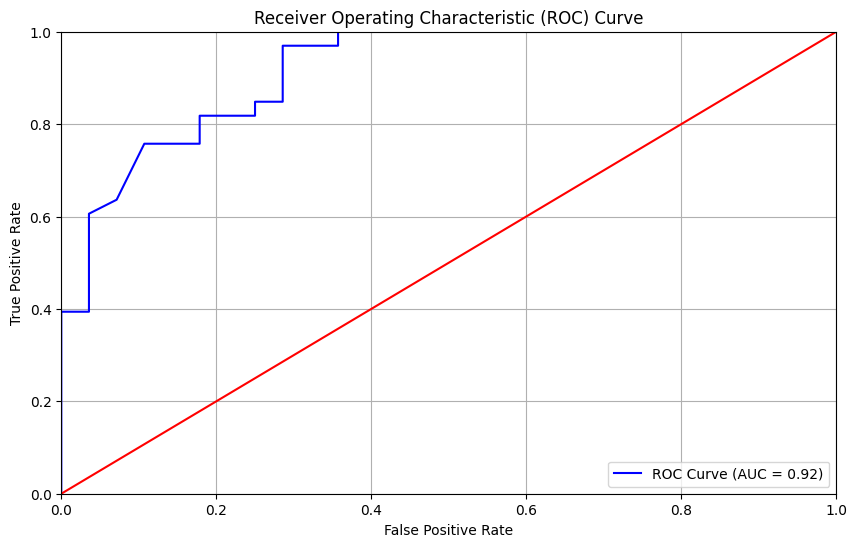

In [22]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_rf)

# Calculate AUC
roc_auc = roc_auc_score(y_test, y_prob_rf)

# Plotting the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='-')  # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

## Gradient Boosting builds models sequentially, where each new model focuses on correcting the errors of the previous one.

In [23]:
# Innitalize Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [24]:
# Make prediction
y_pred_gb = gb_model.predict(X_test)

In [25]:
# Evaluate the model
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))
print(accuracy_score(y_test, y_pred_rf))

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.71      0.78        28
           1       0.79      0.91      0.85        33

    accuracy                           0.82        61
   macro avg       0.83      0.81      0.81        61
weighted avg       0.83      0.82      0.82        61

0.8360655737704918


In [26]:
# Make prediction
y_prob_gb = gb_model.predict_proba(X_test)[:,1]
# ROC-AUC Score
roc_auc_gb = roc_auc_score(y_test, y_prob_gb)
print(f"Gradient Boosting ROC-AUC Score: {roc_auc_rf:.2f}")

Gradient Boosting ROC-AUC Score: 0.92


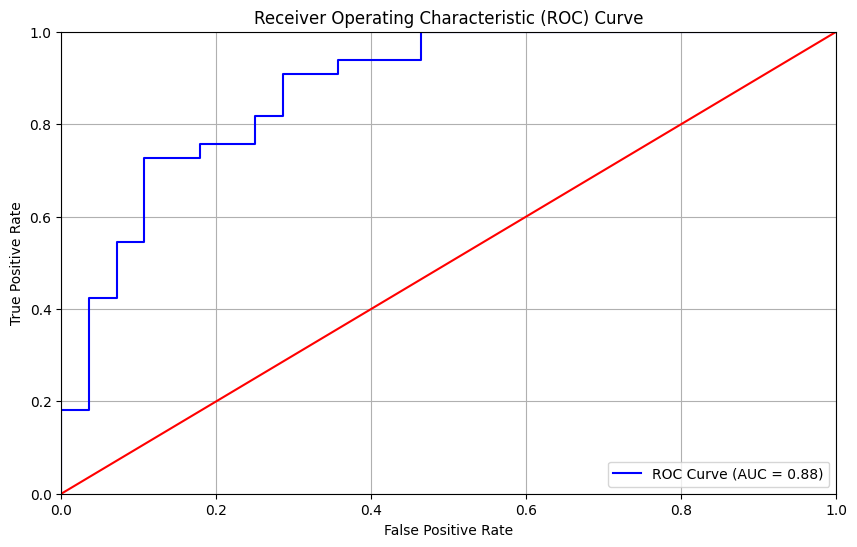

In [27]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_gb)

# Calculate AUC
roc_auc = roc_auc_score(y_test, y_prob_gb)

# Plotting the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='-')  # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

## XGBoost is an efficient and optimized version of Gradient Boosting.

In [28]:
# Initialize XGBoost
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42)


# Train the model
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [29]:
# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

In [30]:
# Evaluate the model
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))
print(accuracy_score(y_test, y_pred_xgb))

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.64      0.75        28
           1       0.76      0.94      0.84        33

    accuracy                           0.80        61
   macro avg       0.83      0.79      0.79        61
weighted avg       0.82      0.80      0.80        61

0.8032786885245902


In [31]:
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]
# ROC-AUC Score
roc_auc_xgb = roc_auc_score(y_test, y_prob_xgb)
print(f"XGBoost ROC-AUC Score: {roc_auc_xgb:.2f}")

XGBoost ROC-AUC Score: 0.86


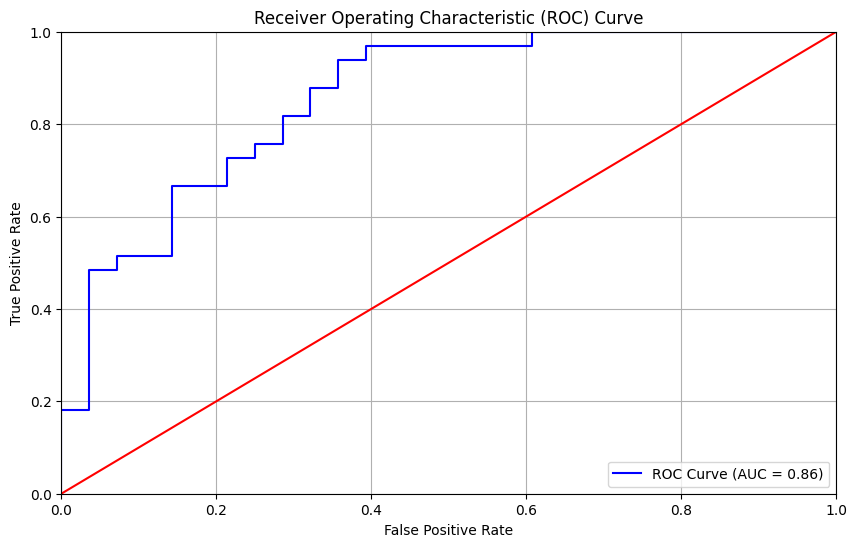

In [32]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_xgb)

# Calculate AUC
roc_auc = roc_auc_score(y_test, y_prob_xgb)

# Plotting the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='-')  # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [33]:
# Compare ROC-AUC scores
print(f"Random Forest ROC-AUC Score: {roc_auc_rf:.2f}")
print(f"Gradient Boosting ROC-AUC Score: {roc_auc_gb:.2f}")
print(f"XGBoost ROC-AUC Score: {roc_auc_xgb:.2f}")


Random Forest ROC-AUC Score: 0.92
Gradient Boosting ROC-AUC Score: 0.88
XGBoost ROC-AUC Score: 0.86


In [35]:
import joblib
joblib.dump(rf_model, 'heart_disease_model.pkl')


['heart_disease_model.pkl']